## Here we will try our best shot to predict the goals with our features

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/Master_UdeM/IFT-6758/Project/ift6758-project-main

/content/gdrive/MyDrive/Master_UdeM/IFT-6758/Project/ift6758-project-main


In [4]:
#!git clone https://GIT_TOKEN@github.com/M0rph3e/ift6758-project-main.git #not anymore
! git pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/M0rph3e/ift6758-project-main
   04f14dd..6645cb3  main       -> origin/main
Updating 04f14dd..6645cb3
Fast-forward
 notebooks/try_your_best_shot.ipynb | 719 +++++++++++++++++++++++++------------
 1 file changed, 499 insertions(+), 220 deletions(-)


In [5]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   ift6758/features/feature_engineering2.py
	modified:   ift6758/metrics/plot_metrics.py

no changes added to commit (use "git add" and/or "git commit -a")


In [6]:
!pip install comet_ml pandas-profiling==2.7.1

     |████████████████████████████████| 305 kB 5.0 MB/s 
     |████████████████████████████████| 252 kB 47.6 MB/s 
     |████████████████████████████████| 675 kB 45.8 MB/s 
     |████████████████████████████████| 58 kB 5.3 MB/s 
     |████████████████████████████████| 4.7 MB 46.0 MB/s 
     |████████████████████████████████| 812 kB 56.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 546 kB 71.9 MB/s 
     |████████████████████████████████| 52 kB 806 kB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=222212bc2449c80b087c04c4fd8cd9b9118e8cebad717c19373e2f8d8ef1887f
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34546 sha256=0ceafd5b675fadb8a99aaff7efc316c78febb4a0e75e9824b6c463678e6839a2
  Stored in

In [7]:
! git branch

  best_shot_trial
  fengineering2
* main


# Real **** starts from here

In [8]:
from ift6758.features.feature_engineering2 import SeasonDataSetTwo
from ift6758.data.data_acquisition import Season
from ift6758.visualizations.simple_visualization import Utilities 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import random
import pandas as pd
import pickle
import sys
import json

import warnings
warnings.filterwarnings("ignore")

In [9]:
train_years = [2015,2016,2017]
valid_years = [2018]
test_years=[2019]


train_dataset = SeasonDataSetTwo(train_years)
valid_dataset = SeasonDataSetTwo(valid_years)
train_df = train_dataset.get_features_2()
valid_df = valid_dataset.get_features_2()

File with all events already Exists, loading from ../ift6758/data/PICKLE//2015_clean_all_events.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2015_period_info.pkl
File with all events already Exists, loading from ../ift6758/data/PICKLE//2016_clean_all_events.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2016_period_info.pkl
File with all events already Exists, loading from ../ift6758/data/PICKLE//2017_clean_all_events.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2017_period_info.pkl
File with all events already Exists, loading from ../ift6758/data/PICKLE//2018_clean_all_events.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2018_period_info.pkl


In [10]:
test_data = SeasonDataSetTwo(test_years)
test_df = test_data.get_features_2()

File with all events already Exists, loading from ../ift6758/data/PICKLE//2019_clean_all_events.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2019_period_info.pkl


# for Part 7

In [11]:
#test_df['gamePk'].astype(str).str[5].unique()
test_df_regular = test_df[test_df['gamePk'].astype(str).str[5]=='2']
test_df_playoff = test_df[test_df['gamePk'].astype(str).str[5]=='3']

# Export the data csv to comet

In [ ]:
from comet_ml import Experiment
import os



exp = Experiment(
    api_key=os.environ.get('COMET_API_KEY'),
    project_name='milestone-2',
    workspace='morph-e',
    log_code=True,
    log_graph=True
)

In [ ]:
exp.log_dataframe_profile(
train_df, 
name='train_set_from_FE2',  # keep this name
dataframe_format='csv'  # ensure you set this flag!
)

exp.log_dataframe_profile(
valid_df, 
name='valid_set_from_FE2',  # keep this name
dataframe_format='csv'  # ensure you set this flag!
)

exp.log_dataframe_profile(
test_df, 
name='test_set_from_FE2',  # keep this name
dataframe_format='csv'  # ensure you set this flag!
)


COMET WARNING: unable to profile dataframe; ignoring
COMET WARNING: unable to profile dataframe; ignoring
COMET WARNING: unable to profile dataframe; ignoring


{'dataframe': {'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=4a1ec1be94d641b6a9fdf5a03ed78719&experimentKey=2de74906d5ad42c0913ded110a44d306',
  'assetId': '4a1ec1be94d641b6a9fdf5a03ed78719',
  'web': 'https://www.comet.ml/api/asset/download?assetId=4a1ec1be94d641b6a9fdf5a03ed78719&experimentKey=2de74906d5ad42c0913ded110a44d306'},
 'profile': None}

# Split and shuffle Data

In [14]:
random.seed(42)

In [15]:
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)
valid_df = valid_df.sample(frac=1)
#for part 7
test_df_regular = test_df_regular.sample(frac=1)
test_df_playoff = test_df_playoff.sample(frac=1)

In [16]:
train_df.head()

result.penaltySeverity  ...  angleSpeed
77357                     NaN  ...    0.000000
139175                    NaN  ...    2.321371
242704                    NaN  ...    0.000000
120936                    NaN  ...    0.000000
126900                    NaN  ...    0.000000

[5 rows x 24 columns]

## Here I am going to do more features selection (add strength) and change the preprocessing (no need to one hot with random forest),
## I will also try to find the best feature with $Χ^2$
## (Need to remove negative values features that I don't find interesting by intuition such as coordinates)

In [64]:
features = ['gameSeconds','timeFromLastEvent','gamePeriod','shotType','result.strength.name', 'shotAngle', 'shotDistance','distanceFromLastEvent', 'rebound','speed','changeInShotAngle','angleSpeed']
label = ['isGoal']

In [18]:
train_df[features].isna().any()
valid_df[features].isna().any()
test_df[features].isna().any()

test_df_regular[features].isna().any()
test_df_playoff[features].isna().any()

gameSeconds              False
timeFromLastEvent        False
gamePeriod               False
shotType                  True
result.strength.name      True
shotAngle                False
shotDistance             False
distanceFromLastEvent     True
rebound                  False
speed                     True
changeInShotAngle        False
angleSpeed                True
dtype: bool

## Treat the 'strength name case now (want to put it into categorical data (nan are 0)

In [19]:
train_df['result.strength.name'] = train_df['result.strength.name'].fillna('Unknown')
valid_df['result.strength.name'] = valid_df['result.strength.name'].fillna('Unknown')
test_df['result.strength.name'] = test_df['result.strength.name'].fillna('Unknown')

test_df_regular['result.strength.name'] = test_df_regular['result.strength.name'].fillna('Unknown')
test_df_playoff['result.strength.name'] = test_df_playoff['result.strength.name'].fillna('Unknown')

In [20]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(train_df[['result.strength.name']])

OrdinalEncoder()

In [21]:
train_df[['result.strength.name']] = enc.transform(train_df[['result.strength.name']]).astype(int)
valid_df[['result.strength.name']] = enc.transform(valid_df[['result.strength.name']]).astype(int)
test_df[['result.strength.name']] = enc.transform(test_df[['result.strength.name']]).astype(int)

test_df_regular[['result.strength.name']] = enc.transform(test_df_regular[['result.strength.name']]).astype(int)
test_df_playoff[['result.strength.name']] = enc.transform(test_df_playoff[['result.strength.name']]).astype(int)

### Replace inf with nan (annoying in normalization)

In [22]:
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
valid_df.replace([np.inf, -np.inf], np.nan, inplace=True)
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)

test_df_regular.replace([np.inf, -np.inf], np.nan, inplace=True)
test_df_playoff.replace([np.inf, -np.inf], np.nan, inplace=True)

In [23]:
#drop rows with nan
train_df = train_df[train_df['shotType'].notna()]
valid_df = valid_df[valid_df['shotType'].notna()]
test_df = test_df[test_df['shotType'].notna()]
test_df_regular = test_df_regular[test_df_regular['shotType'].notna()]
test_df_playoff = test_df_playoff[test_df_playoff['shotType'].notna()]

train_df = train_df[train_df['shotAngle'].notna()]
valid_df = valid_df[valid_df['shotAngle'].notna()]
test_df = test_df[test_df['shotAngle'].notna()]
test_df_regular = test_df_regular[test_df_regular['shotAngle'].notna()]
test_df_playoff = test_df_playoff[test_df_playoff['shotAngle'].notna()]

train_df = train_df[train_df['shotDistance'].notna()]
valid_df = valid_df[valid_df['shotDistance'].notna()]
test_df = test_df[test_df['shotDistance'].notna()]
test_df_regular = test_df_regular[test_df_regular['shotDistance'].notna()]
test_df_playoff = test_df_playoff[test_df_playoff['shotDistance'].notna()]

train_df = train_df[train_df['speed'].notna()]
valid_df = valid_df[valid_df['speed'].notna()]
test_df = test_df[test_df['speed'].notna()]
test_df_regular = test_df_regular[test_df_regular['speed'].notna()]
test_df_playoff = test_df_playoff[test_df_playoff['speed'].notna()]

train_df = train_df[train_df['changeInShotAngle'].notna()]
valid_df = valid_df[valid_df['changeInShotAngle'].notna()]
test_df = test_df[test_df['changeInShotAngle'].notna()]
test_df_regular = test_df_regular[test_df_regular['changeInShotAngle'].notna()]
test_df_playoff = test_df_playoff[test_df_playoff['changeInShotAngle'].notna()]

"""
train_df = train_df[train_df['coordinatesX'].notna()]
valid_df = valid_df[valid_df['coordinatesX'].notna()]
test_df = test_df[test_df['coordinatesX'].notna()]
test_df_regular = test_df_regular[test_df_regular['coordinatesX'].notna()]
test_df_playoff = test_df_playoff[test_df_playoff['coordinatesX'].notna()]

train_df = train_df[train_df['coordinatesY'].notna()]
valid_df = valid_df[valid_df['coordinatesY'].notna()]
test_df = test_df[test_df['coordinatesY'].notna()]
test_df_regular = test_df_regular[test_df_regular['coordinatesY'].notna()]
test_df_playoff = test_df_playoff[test_df_playoff['coordinatesY'].notna()]

train_df = train_df[train_df['lastEventCoordinatesY'].notna()]
valid_df = valid_df[valid_df['lastEventCoordinatesY'].notna()]
test_df = test_df[test_df['lastEventCoordinatesY'].notna()]
test_df_regular = test_df_regular[test_df_regular['lastEventCoordinatesY'].notna()]
test_df_playoff = test_df_playoff[test_df_playoff['lastEventCoordinatesY'].notna()]

train_df = train_df[train_df['lastEventCoordinatesX'].notna()]
valid_df = valid_df[valid_df['lastEventCoordinatesX'].notna()]
test_df = test_df[test_df['lastEventCoordinatesX'].notna()]
test_df_regular = test_df_regular[test_df_regular['lastEventCoordinatesX'].notna()]
test_df_playoff = test_df_playoff[test_df_playoff['lastEventCoordinatesX'].notna()]
"""

train_df = train_df[train_df['angleSpeed'].notna()]
valid_df = valid_df[valid_df['angleSpeed'].notna()]
test_df = test_df[test_df['angleSpeed'].notna()]
test_df_regular = test_df_regular[test_df_regular['angleSpeed'].notna()]
test_df_playoff = test_df_playoff[test_df_playoff['angleSpeed'].notna()]



In [25]:
train_df[features].isna().any()
valid_df[features].isna().any()
test_df[features].isna().any()
test_df_regular[features].isna().any()
test_df_playoff[features].isna().any()

gameSeconds              False
timeFromLastEvent        False
gamePeriod               False
shotType                 False
result.strength.name     False
shotAngle                False
shotDistance             False
distanceFromLastEvent    False
rebound                  False
speed                    False
changeInShotAngle        False
angleSpeed               False
dtype: bool

### Ordinal encore shot type

In [26]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(train_df[['shotType']])

train_df[['shotType']] = enc.transform(train_df[['shotType']]).astype(int)
valid_df[['shotType']] = enc.transform(valid_df[['shotType']]).astype(int)
test_df[['shotType']] = enc.transform(test_df[['shotType']]).astype(int)

test_df_regular[['shotType']] = enc.transform(test_df_regular[['shotType']]).astype(int)
test_df_playoff[['shotType']] = enc.transform(test_df_playoff[['shotType']]).astype(int)

In [27]:
#Sanity check
test_df['shotType'].unique()
#test_df['result.strength.name'].unique()

array([6, 2, 3, 0, 1, 4, 5])

In [28]:
train_df[features].isna().any()
valid_df[features].isna().any()
test_df[features].isna().any()
test_df_regular[features].isna().any()
test_df_playoff[features].isna().any()

gameSeconds              False
timeFromLastEvent        False
gamePeriod               False
shotType                 False
result.strength.name     False
shotAngle                False
shotDistance             False
distanceFromLastEvent    False
rebound                  False
speed                    False
changeInShotAngle        False
angleSpeed               False
dtype: bool

### Split Features label

In [97]:
X_train = train_df[features]
y_train = train_df[label]

X_valid = valid_df[features]
y_valid = valid_df[label]

X_test = test_df[features]
y_test = test_df[label]

X_test_playoff = test_df_playoff[features]
y_test_playoff = test_df_playoff[label]

X_test_regular = test_df_regular[features]
y_test_regular = test_df_regular[label]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape,X_test_regular.shape, y_test_regular.shape, X_test_playoff.shape, y_test_playoff.shape

((238046, 12),
 (238046, 1),
 (83588, 12),
 (83588, 1),
 (74168, 12),
 (74168, 1),
 (66366, 12),
 (66366, 1),
 (7802, 12),
 (7802, 1))

## Use feature selection with chi²
* first, want to try `pandas_profiling`

In [98]:
from pandas_profiling import ProfileReport

ProfileReport(X_train)

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### After seeing the warnings about the big amount of zeros in `changeInShotAngle` and `angleSpeed` I might consider to remove them, but first chi², I will try to select the 8 best by keeping categorical data

In [99]:
features_new = features.copy()
features_new.remove('shotAngle') #negative and categorical value and I judge it important so no in chi²
features_new.remove('shotType')
features_new.remove('gamePeriod')
features_new.remove('result.strength.name')
features_new.remove('rebound')
len(features_new)

7

In [100]:
features_new

['gameSeconds',
 'timeFromLastEvent',
 'shotDistance',
 'distanceFromLastEvent',
 'speed',
 'changeInShotAngle',
 'angleSpeed']

In [101]:
#taken from https://medium.com/analytics-vidhya/feature-selection-using-scikit-learn-5b4362e0c19b
from sklearn.feature_selection import SelectKBest, chi2

X_8_best= SelectKBest(chi2, k=4).fit(X_train[features_new], y_train)
mask = X_8_best.get_support() #list of booleans for selected features
new_feat = [] 
for bool, feature in zip(mask, X_train[features_new].columns):
  if bool:
    new_feat.append(feature)
print("The best features are:{}".format(new_feat)) # The list of your 4 best features

The best features are:['gameSeconds', 'shotDistance', 'changeInShotAngle', 'angleSpeed']


###Keep those features and do th same as before : rand forest with grid search

In [102]:
new_feat.append('shotAngle')
new_feat.append('shotType')
new_feat.append('gamePeriod')
new_feat.append('result.strength.name')
new_feat.append('rebound')

In [103]:
new_feat

['gameSeconds',
 'shotDistance',
 'changeInShotAngle',
 'angleSpeed',
 'shotAngle',
 'shotType',
 'gamePeriod',
 'result.strength.name',
 'rebound']

In [104]:
X_train = X_train[new_feat]

X_valid = X_valid[new_feat]

X_test = X_test[new_feat]

X_test_playoff = X_test_playoff[new_feat]

X_test_regular = X_test_regular[new_feat]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape,X_test_regular.shape, y_test_regular.shape, X_test_playoff.shape, y_test_playoff.shape

((238046, 9),
 (238046, 1),
 (83588, 9),
 (83588, 1),
 (74168, 9),
 (74168, 1),
 (66366, 9),
 (66366, 1),
 (7802, 9),
 (7802, 1))

# Change rebound feature

In [105]:
X_train['rebound'] = X_train['rebound'].astype(int)
X_valid['rebound'] = X_valid['rebound'].astype(int)
X_test['rebound'] = X_test['rebound'].astype(int)
X_test_playoff['rebound'] = X_test['rebound'].astype(int)
X_test_regular['rebound'] = X_test['rebound'].astype(int)

# Preprocess ends here

In [106]:
X_test_playoff.head()

gameSeconds  shotDistance  ...  result.strength.name  rebound
73661        180.0     34.205263  ...                     3        0
74123        265.0    146.659470  ...                     3        0
75044       1108.0      5.830952  ...                     3        0
71187       1061.0     52.201533  ...                     0        0
74598        662.0    156.041661  ...                     3        0

[5 rows x 9 columns]

# Normalize numerical data 

### Export your preprocessed set on comet

In [ ]:
exp.log_dataframe_profile(
X_train, 
name='preprocesseded_train_features',  # keep this name
dataframe_format='csv'  # ensure you set this flag!
)

exp.log_dataframe_profile(
X_valid, 
name='preprocessed_valid_features',  # keep this name
dataframe_format='csv'  # ensure you set this flag!
)

exp.log_dataframe_profile(
X_test, 
name='preprocessed_test_features',  # keep this name
dataframe_format='csv'  # ensure you set this flag!
)


COMET WARNING: unable to profile dataframe; ignoring
COMET WARNING: unable to profile dataframe; ignoring
COMET WARNING: unable to profile dataframe; ignoring


{'dataframe': {'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=ab84a834ec5e4d70aec8cab237859355&experimentKey=e63f825c8ea044f5becbd0755d4bee36',
  'assetId': 'ab84a834ec5e4d70aec8cab237859355',
  'web': 'https://www.comet.ml/api/asset/download?assetId=ab84a834ec5e4d70aec8cab237859355&experimentKey=e63f825c8ea044f5becbd0755d4bee36'},
 'profile': None}

### Normalize

In [107]:
num = ['gameSeconds', 'shotAngle', 'shotDistance','angleSpeed','changeInShotAngle']

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[num])

X_train[num] = scaler.transform(X_train[num])
X_valid[num] = scaler.transform(X_valid[num])
X_test[num] = scaler.transform(X_test[num])
X_test_playoff[num]= scaler.transform(X_test_playoff[num])
X_test_regular[num]=scaler.transform(X_test_regular[num])

In [109]:
X_test_regular

gameSeconds  shotDistance  ...  result.strength.name  rebound
3772     -1.031920      0.084230  ...                     3        1
21967    -1.445485     -0.313114  ...                     3        0
20140     0.016352      0.275264  ...                     3        0
20680     1.575836     -1.005528  ...                     3        1
5533      1.213967      0.187706  ...                     3        0
...            ...           ...  ...                   ...      ...
38185    -0.190430     -0.142460  ...                     3        1
36260    -0.138735     -0.674152  ...                     3        0
34931    -0.934273      0.272361  ...                     3        0
29356    -0.782058      0.607552  ...                     3        0
23920    -0.127247      0.678249  ...                     3        0

[66366 rows x 9 columns]

# Try Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators':[50,65,80,100,115,130,150],
     'max_depth': [5,6,7,8,9,10,11,12,13,14,15,18]
}

rf = RandomForestClassifier(criterion='entropy')
sh = HalvingGridSearchCV(rf,param_grid)
model = sh.fit(X_train,y_train)

In [121]:
model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=80)

### Measurements on valid Set

In [122]:
y_pred_valid  = model.predict(X_valid)

In [123]:
y_proba_val = model.predict_proba(X_valid)[:,1] # get the proba of having a goal (pred=1)

In [124]:
score_valid = model.score(X_valid,y_valid)
score_valid

1.0

In [ ]:
#log metric
exp.log_metric("Accuracy on valid (2018) set", score_valid)

In [125]:
%matplotlib inline
plt.close('all')

# Export model on comet before plotting

In [130]:
weights_dir = "../ift6758/models/weights"
experiment = "Random-forest-on-valid-with-FE2"
predscore_val_dict={}

In [ ]:
!ls ..

ift6758  ift6758-project-main


In [131]:
import joblib

predscore_val_dict[experiment]={}
predscore_val_dict[experiment]['true_valid_label']=y_valid
predscore_val_dict[experiment]['proba']=y_proba_val
predscore_val_dict[experiment]['prediction']=y_pred_valid

## Dumping model
filename=f"{weights_dir}/{experiment}.pkl"
joblib.dump(model,filename)

['../ift6758/models/weights/Random-forest-on-valid-with-FE2.pkl']

In [132]:
exp.log_model("Random Forest", "../ift6758/models/weights/Random-forest-with-FE2.pkl")

NameError: ignored

# Plotting

In [ ]:
!git pull

Already up to date.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75817
           1       1.00      1.00      1.00      7771

    accuracy                           1.00     83588
   macro avg       1.00      1.00      1.00     83588
weighted avg       1.00      1.00      1.00     83588



('Confusion Matrix', None)

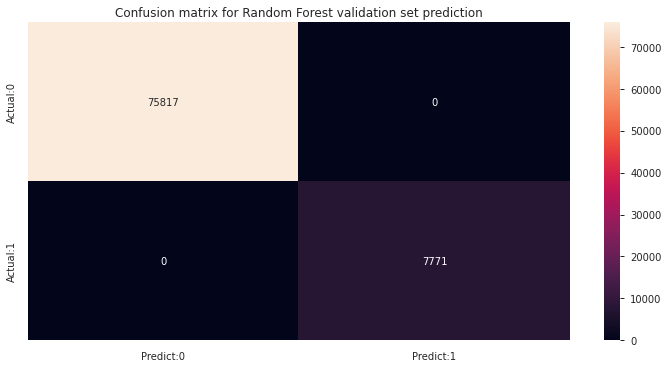

In [133]:
from ift6758.metrics import plot_metrics

#exp.log_figure(
"Confusion Matrix",plot_metrics.plotConfusion(y_valid,y_pred_valid, title='Confusion matrix for Random Forest validation set prediction')#)

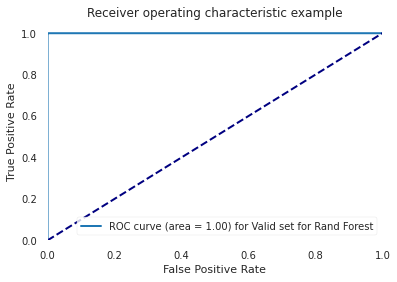

In [134]:
plot_metrics.plot_roc([y_valid],[y_proba_val],["Valid set for Rand Forest"])

ValueError: ignored

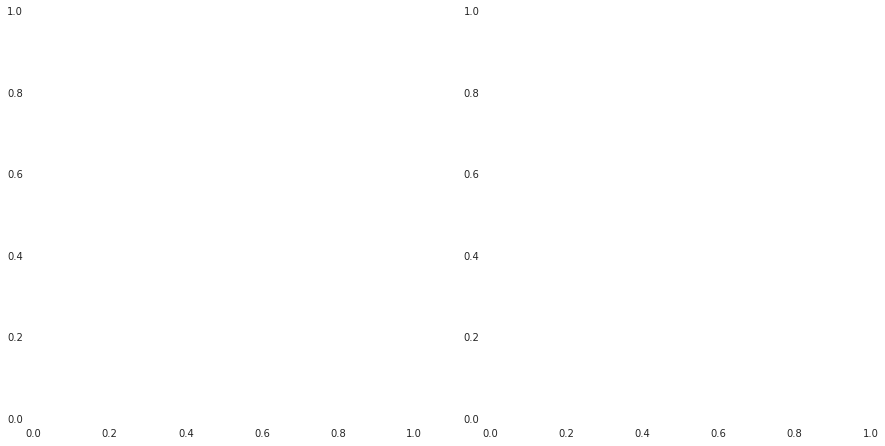

In [135]:
plot_metrics.plot_percentile([y_valid],[y_proba_val],bin_width=5,plot_labels=["Valid set for Rand Forest"])

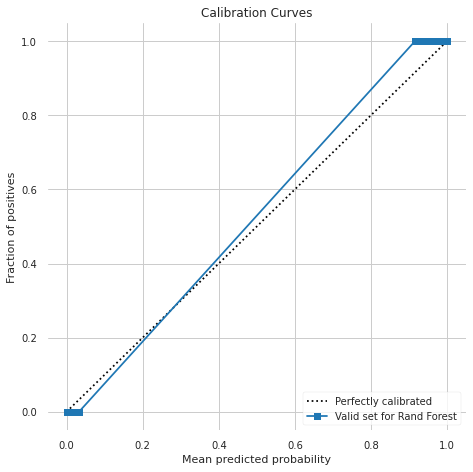

In [136]:
plot_metrics.plot_calibration([y_valid],[y_proba_val],plot_labels=["Valid set for Rand Forest"])

### after I dl the img, export them on Comet

In [ ]:
exp.log_image("figures/roc.png",name="ROC with validation set")

{'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=40416214fcc94006b0ab97bf72e15a30&experimentKey=e63f825c8ea044f5becbd0755d4bee36',
 'imageId': '40416214fcc94006b0ab97bf72e15a30',
 'web': 'https://www.comet.ml/api/image/download?imageId=40416214fcc94006b0ab97bf72e15a30&experimentKey=e63f825c8ea044f5becbd0755d4bee36'}

In [ ]:
exp.log_image("figures/percentile.png",name="Percentile with validation set")
exp.log_image("figures/calibration.png",name="Calibrationn figure with validation set")

{'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=b42f7c346b204ca5be7f6a361d82f7a0&experimentKey=e63f825c8ea044f5becbd0755d4bee36',
 'imageId': 'b42f7c346b204ca5be7f6a361d82f7a0',
 'web': 'https://www.comet.ml/api/image/download?imageId=b42f7c346b204ca5be7f6a361d82f7a0&experimentKey=e63f825c8ea044f5becbd0755d4bee36'}

# On test sets (regular and playoff)

In [138]:
pred_regular  = model.predict(X_test_regular)
proba_regular = model.predict_proba(X_test_regular)[:,1] # get the proba of having a goal (pred=1)
score_regular = model.score(X_test_regular,y_test_regular)
score_regular

1.0

In [139]:
exp.log_metric("Test score on Regular Season", score_regular)

NameError: ignored

In [140]:
pred_playoff  = model.predict(X_test_playoff)
proba_playoff = model.predict_proba(X_test_playoff)[:,1] # get the proba of having a goal (pred=1)
score_playoff = model.score(X_test_playoff,y_test_playoff)
score_playoff

1.0

In [141]:
exp.log_metric("Test score on Playoffs (2019)", score_playoff)

NameError: ignored

## Export model

In [142]:
weights_dir = "../ift6758/models/weights"
experiment = "Random-forest-test-regular-with-FE2"
predscore_val_dict={}

In [144]:
import joblib

predscore_val_dict[experiment]={}
predscore_val_dict[experiment]['true_test_reg_label']=y_test_regular
predscore_val_dict[experiment]['proba']=proba_regular
predscore_val_dict[experiment]['prediction']=pred_regular

## Dumping model
filename=f"{weights_dir}/{experiment}.pkl"
joblib.dump(model,filename)

['../ift6758/models/weights/Random-forest-test-regular-with-FE2.pkl']

In [145]:
weights_dir = "../ift6758/models/weights"
experiment = "Random-forest-test-playoff-with-FE2"
predscore_val_dict={}

import joblib

predscore_val_dict[experiment]={}
predscore_val_dict[experiment]['true_test_reg_label']=y_test_playoff
predscore_val_dict[experiment]['proba']=proba_playoff
predscore_val_dict[experiment]['prediction']=pred_playoff

## Dumping model
filename=f"{weights_dir}/{experiment}.pkl"
joblib.dump(model,filename)

['../ift6758/models/weights/Random-forest-test-playoff-with-FE2.pkl']

In [ ]:
exp.log_model("Random Forest", "../ift6758/models/weights/Random-forest-with-FE2.pkl")

{'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=1467cfb3eeea4364a6f6ad97d4c06463&experimentKey=e63f825c8ea044f5becbd0755d4bee36',
 'assetId': '1467cfb3eeea4364a6f6ad97d4c06463',
 'web': 'https://www.comet.ml/api/asset/download?assetId=1467cfb3eeea4364a6f6ad97d4c06463&experimentKey=e63f825c8ea044f5becbd0755d4bee36'}

# Plot

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60194
           1       1.00      1.00      1.00      6172

    accuracy                           1.00     66366
   macro avg       1.00      1.00      1.00     66366
weighted avg       1.00      1.00      1.00     66366

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7139
           1       1.00      1.00      1.00       663

    accuracy                           1.00      7802
   macro avg       1.00      1.00      1.00      7802
weighted avg       1.00      1.00      1.00      7802



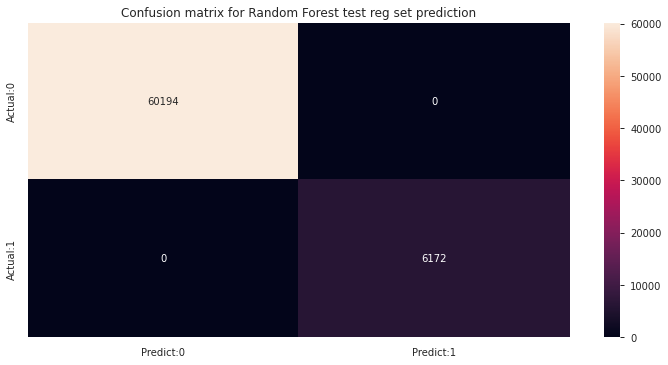

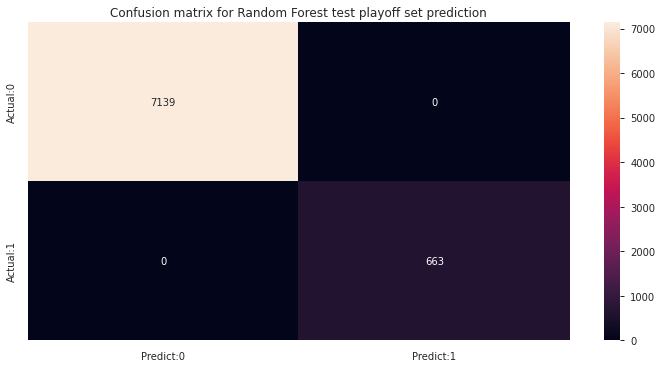

In [148]:
from ift6758.metrics import plot_metrics

#exp.log_figure("Confusion Matrix for regular season test set",
plot_metrics.plotConfusion(y_test_regular,pred_regular, title='Confusion matrix for Random Forest test reg set prediction')#)
#exp.log_figure("Confusion Matrix for playoff season test set", 
plot_metrics.plotConfusion(y_test_playoff,pred_playoff, title='Confusion matrix for Random Forest test playoff set prediction')#)

In [150]:
label_list = [y_test_regular, y_test_playoff]
proba_list = [proba_regular,proba_playoff]
pred_list = [pred_regular,pred_playoff]
title_list = ["Regular Season", "Playoff"]

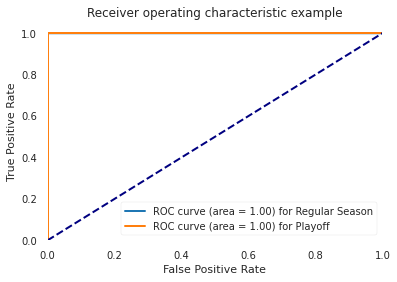

ValueError: ignored

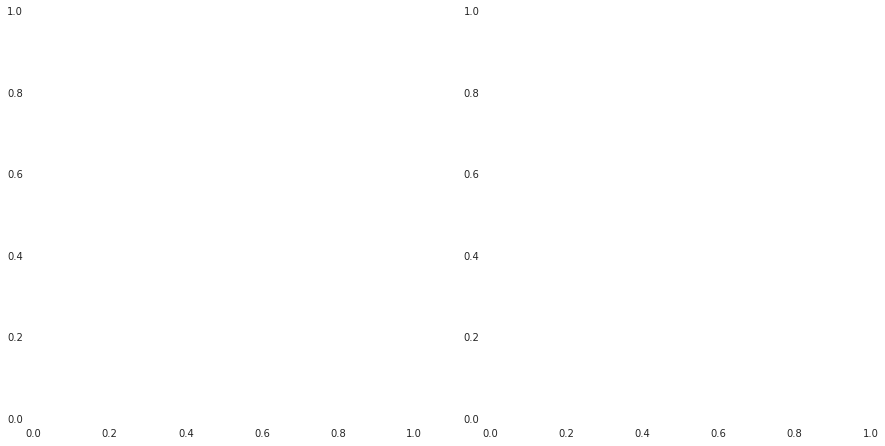

In [151]:
plot_metrics.plot_roc(label_list,proba_list,title_list)
plot_metrics.plot_percentile(label_list,proba_list,bin_width=5,plot_labels=title_list)
plot_metrics.plot_calibration(label_list,proba_list,plot_labels=title_list)

In [ ]:
exp.log_image("figures/roc_test.png",name="Percentile with test set")
exp.log_image("figures/percentile_test.png",name="Percentile with test set")
exp.log_image("figures/calibration_test.png",name="Calibrationn figure with test set")

{'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=004e84d8139c406785ffe8ddbe25643b&experimentKey=e63f825c8ea044f5becbd0755d4bee36',
 'imageId': '004e84d8139c406785ffe8ddbe25643b',
 'web': 'https://www.comet.ml/api/image/download?imageId=004e84d8139c406785ffe8ddbe25643b&experimentKey=e63f825c8ea044f5becbd0755d4bee36'}

In [ ]:
exp.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/morph-e/milestone-2/e63f825c8ea044f5becbd0755d4bee36
COMET INFO:   Metrics:
COMET INFO:     Accuracy on valid (2018) set  : 0.907068000191415
COMET INFO:     Test score on Playoffs (2019) : 0.9148936170212766
COMET INFO:     Test score on Regular Season  : 0.9070457764517976
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=https%3A%2F%2Fgithub.com%2FM0rph3e%2Fift6758-project-main%2Fblob%2Fmain%2Fnotebooks%2Ftry_your_best_shot.ipynb
COMET INFO:   Parameters:
COMET INFO:     bootstrap                : True
COMET INFO:     ccp_alpha                : 0.0
COMET INFO:     class_weight             : 1
COMET INFO:     criterion                : entropy
COMET INFO:     max_depth                : 12
COME